# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. É importante reconhecer que este projeto visa apenas a prática de habilidades em visualização e pandas, não se trata de uma análise financeira robusta.
____
Vamos nos concentrar nas ações dos banco e ver como eles performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2016.

## Obter dados

Iremos usar a fonte de dados oferecida pela Alpha Vantage, que disponibiliza uma API gratuita para obter dados financeiros, incluindo informações sobre ações. .

* Nota: [Você precisará instalar pandas-datareader para que isso funcione!](Https://github.com/pydata/pandas-datareader) O datareader Pandas permite que você leia informações de estoque diretamente da internet. [Link de orientação](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) Use estes links para instrução de instalação [**pip install pandas-datareader**](https://pandas-datareader.readthedocs.io/en/latest/index.html). 
Veremos agora como podemos usar o Alpha Vantage com o pandas_datareader:

Primeiro, precisamos começar com as importações necessárias.

**Os imports**

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
%matplotlib inline

Veremos agora como podemos usar o Alpha Vantage com o pandas_datareader:

**Primeiro, você precisa obter uma chave de API gratuita no site do Alpha Vantage:** Alpha Vantage - [Alpha Vantage - Sign Up](https://www.alphavantage.co/support/#api-key) 
  -  Após obter a chave de API, você pode usar o código abaixo:

In [2]:
# api_key = 'SUA_CHAVE_API_ALPHA_VANTAGE' Substitua 'SUA_CHAVE_API_ALPHA_VANTAGE' pela chave de API que você obteve
api_key = 'PUERWR701G55OCA7'

**Defina as datas de início e fim para a coleta de dados:**

In [3]:
start_date = dt.datetime(2006, 1, 1)
end_date = dt.datetime(2016, 1, 1)

## Dados
**Usaremos o datareader de pandas para obter os dados sobre ações dos seguites Bancos:**
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Obteremos os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos. Devemos definir cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker(código dos ativos em suas respectivas bolsas).
Isso envolverá algumas etapas:**
Você pode descobrir o símbolo do ticker para cada banco no site do [Google Finance](https://www.google.com/finance/)
    
**Use [esta página de documentação](https://pydata.github.io/pandas-datareader/remote_data.html) para obter dicas e instruções. Use o google finance como um fonte, por exemplo:**

     #Banco da América 
     BAC = data.DataReader("BAC", "google", início e fim)


**Crie uma lista dos símbolos dos tickers (como strings) em ordem alfabética. Chame esta lista: tickers**

In [5]:
# Lista de símbolos de ações dos bancos em ordem alfabética
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# iremos precisar de um dicionário para armazenar os DataFrames de cada banco
bank_data = {}

In [6]:
# Loop com um bloco 'try' para obter dados para cada banco
for bank in tickers:
    try:
        # Obtenha dados do Alpha Vantage
        data = pdr.av.time_series.AVTimeSeriesReader(
            symbols=bank,
            start=start_date,
            end=end_date,
            api_key=api_key
        ).read()

        # Armazene os dados no dicionário
        bank_data[bank] = data

        print(f"Dados do banco {bank} obtidos com sucesso")
    except Exception as e:
        print(f"Erro ao obter os dados do banco {bank}: {e}")

# bank_data agora contém DataFrames para cada banco

Dados do banco BAC obtidos com sucesso
Dados do banco C obtidos com sucesso
Dados do banco GS obtidos com sucesso
Dados do banco JPM obtidos com sucesso
Dados do banco MS obtidos com sucesso
Dados do banco WFC obtidos com sucesso


**NOTA: Caso tenha dúvidas com relaçao a classe `pandas_datareader.av.forex.AVForexReader`, consulte a** [Documentação AlphaVantage](https://pandas-datareader.readthedocs.io/en/latest/readers/alphavantage.html).

In [7]:
# Acesse os dados usando bank_data['BAC'], bank_data['C'], etc.
bank_data['BAC']

,open,high,low,close,volume
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970700
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15619400
...,...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27,29373415
2015-12-28,17.22,17.23,16.98,17.13,41759993
2015-12-29,17.25,17.35,17.16,17.28,45628449
2015-12-30,17.20,17.24,17.04,17.05,35035518


**Veja agora um exemplo de como acessar a série de fechamentos 'closes' do BAC:**

<Axes: >

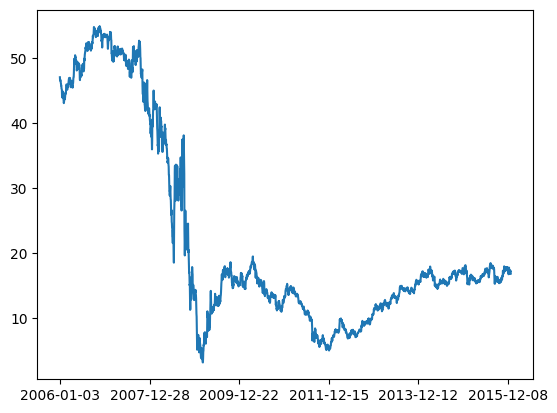

In [8]:
bank_data['BAC']['close'].plot()

**Use pd.concat para concatenar os DataFrames do banco juntos em um único chamado bank_stocks. Defina o argumento das chaves igual à lista de tickers. Também preste atenção em que eixo você concatena.**
* NOTA: Lembre-se que os DataFrames de cada banco estão contidos em um dicionário e seus acessos são feitos através das chaves, ex.: bank_data['BAC']

In [9]:
bank_stocks = pd.concat([bank_data['BAC'], bank_data['C'], bank_data['GS'], bank_data['JPM'], bank_data['MS'], bank_data['WFC']], axis=1, keys=tickers)

**Defina os níveis dos nomes das colunas (este é preenchido para você):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

** Verifique o cabeçalho do DataFrame bank_stocks. **

In [17]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# Análise de dados exploratória

Vamos explorar os dados um pouco! Antes de prosseguir, sugiro que você verifique a documentação no [**Multi-Level Indexing**](http://pandas.pydata.org/pandas-docs/stable/advanced.html) e Usando [**.xs link**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Consulte as soluções se você não consegue descobrir como usar .xs (), uma vez que isso será uma parte importante desse projeto.

** Qual é o preço máximo de fechamento para o estoque de cada banco durante todo o período? **

In [18]:
bank_stocks.xs(key='close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

**Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

onde:
* rₜ é a taxa de retorno no dia
* Pₜ é o preço atual do ativo.
* Pₜ₋₁ é o preço do ativo no dia anterior
>>


In [14]:
returns = pd.DataFrame()

**Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame.**

In [19]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['close'].pct_change()
returns.head(50)

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002244,0.007637,-0.000751,-0.001513,0.005724
2006-01-17,-0.010699,-0.010016,-0.005028,-0.005261,-0.009599,-0.010277


**Crie um parplot utilizando seaborn no dataframe de retorno.**

**Bank of America - Return**

<Axes: >

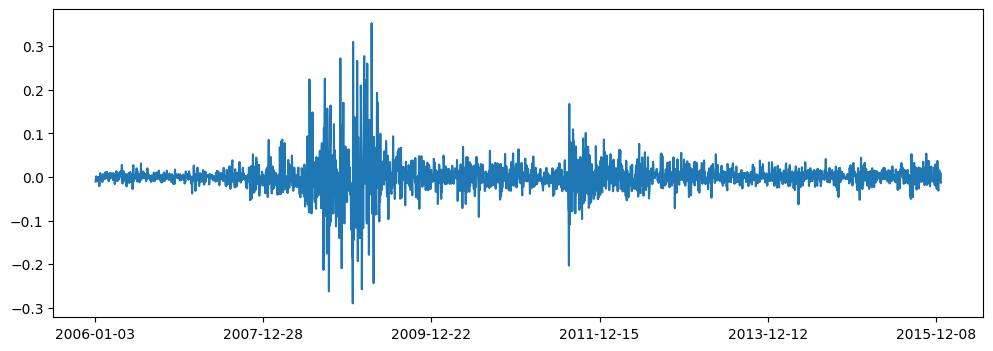

In [20]:
returns['BACReturn'].plot(figsize=(12, 4))

**Goldman Sachs - Return**

<Axes: >

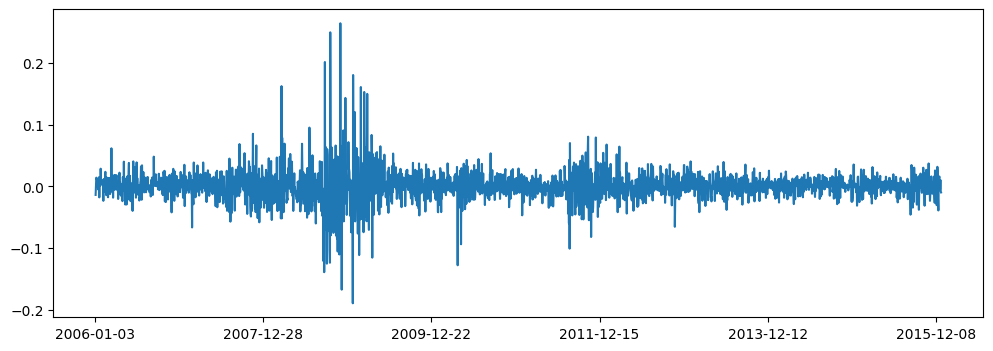

In [21]:
returns['GSReturn'].plot(figsize=(12, 4))

**CitiGroup - Return**

<Axes: >

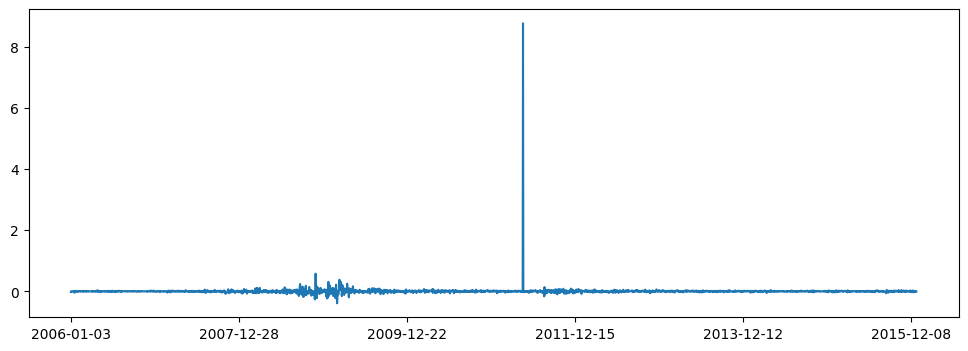

In [22]:
returns['CReturn'].plot(figsize=(12, 4))

**JPMorgan Chase - Return**

<Axes: >

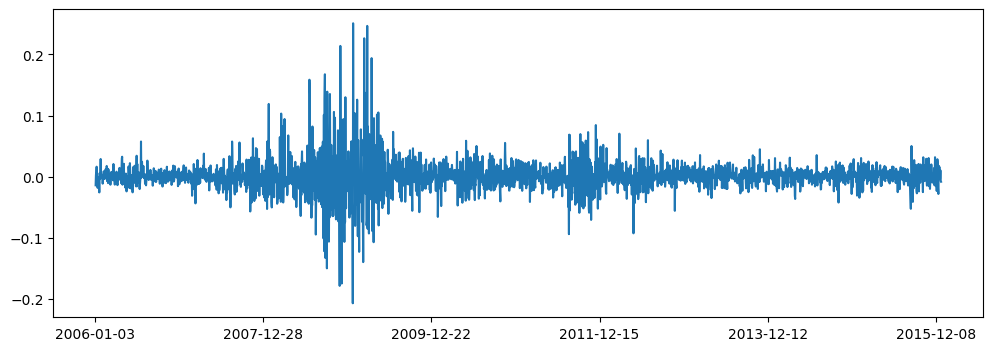

In [23]:
returns['JPMReturn'].plot(figsize=(12, 4))

**Morgan Stanley - Return**

<Axes: >

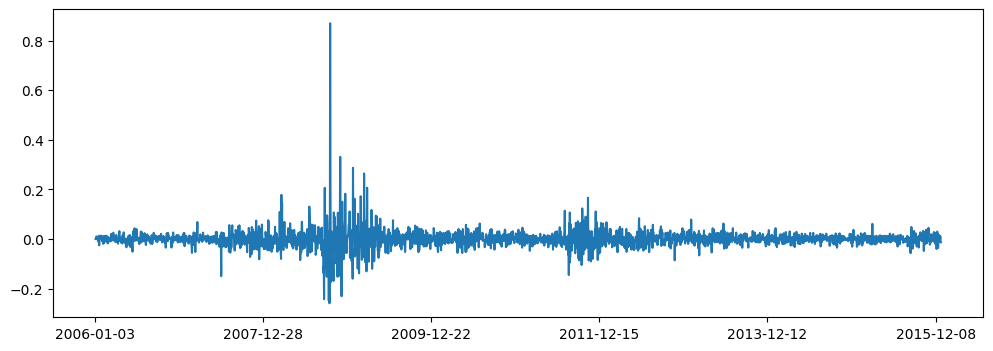

In [24]:
returns['MSReturn'].plot(figsize=(12, 4))

**Wells Fargo - Return**

<Axes: >

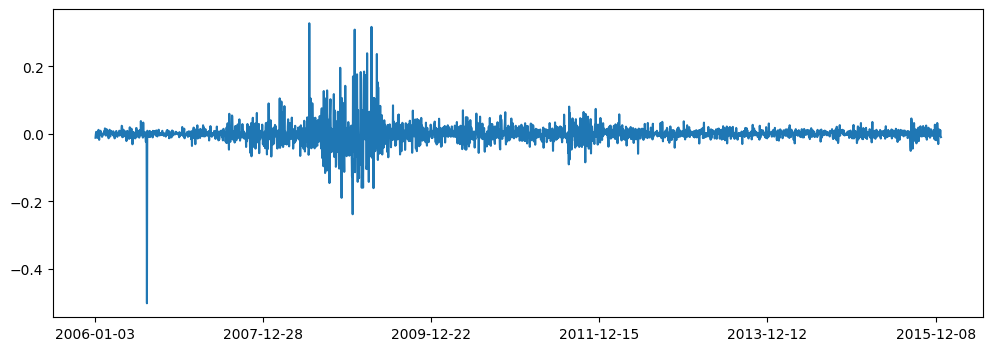

In [25]:
returns['WFCReturn'].plot(figsize=(12, 4))

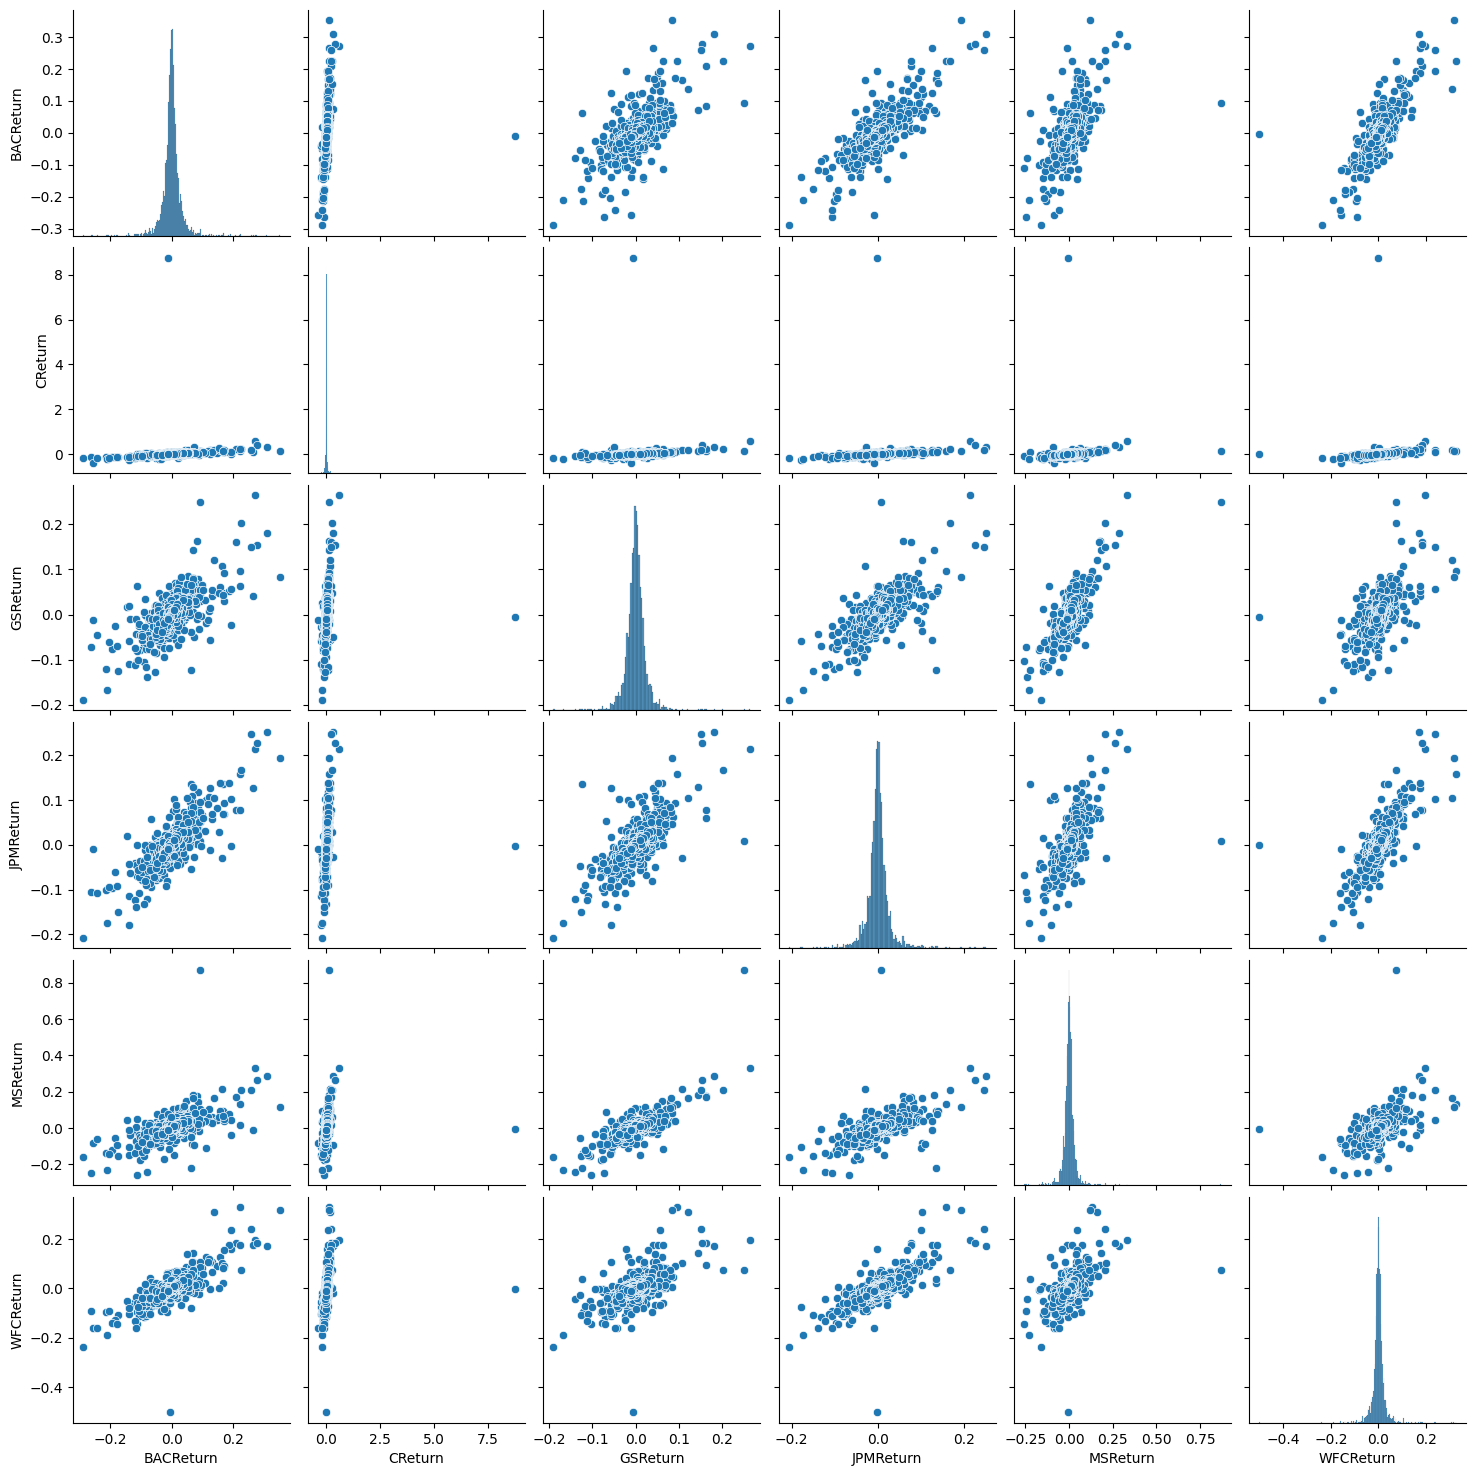

In [38]:
import seaborn as sns
sns.pairplot(returns[1:])

O pairplote gerado mostrar uma correlação entre os retornos de cada banco 
Isso ocorre pois esses ativos fazem parte de um mesmo 'Índice' S&P 500

**Usando o seu DataFrame returns, descubra quais datas cada ação dos bancos teve o melhor e o pior dia de retorno. Você deve notar que 4 dos bancos compartilham o mesmo dia para a pior queda. Alguma coisa significante aconteceu naquele dia?**

In [30]:
#pior dia de returno de cada banco
returns.idxmin()

BACReturn    2009-01-20
CReturn      2009-02-27
GSReturn     2009-01-20
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2006-08-14
dtype: object

Alguns bancos teve seus piores retorno em 20/01/2009 Essa data coincide com o dia da Posse do ex-presidente Obama. Provavelmente alguns investidores entraram em pânico devido  a uma transição política tão relevante.

In [31]:
#melhor dia de returno de cada banco
returns.idxmax()

BACReturn    2009-04-09
CReturn      2011-05-09
GSReturn     2008-11-24
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: object

**O pior e o melhor retorno do Bank of America**

In [27]:
returns['BACReturn'].min() #pior

-0.2896935933147633

In [28]:
returns['BACReturn'].max() #melhor

0.3526912181303119

**Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015?**

Primeiro temos que descobrir qual ação é a mais arriscada durante todo o período de tempo. Para isso devemos analisar os devios padroes das series de retorono  e identificar qual ação é mais arriscada nos anos de 2006 a 2016.

In [32]:
returns.std()

BACReturn    0.036628
CReturn      0.179066
GSReturn     0.025358
JPMReturn    0.027651
MSReturn     0.037821
WFCReturn    0.031838
dtype: float64

Como CitiGroup(CReturn) é o que maior desvio, então ele é o mais volátio coosequentimente o mais arriscad.o

**AGORA VAMOS FILTRAR ESSES DADOS PARA 2015**
* Queremos agora descobrir a ação mais arriscada para 2015

In [34]:
#conveter o index(que são str) em 'TimeStamp'
returns.index = pd.to_datetime(returns.index)

In [35]:
type(returns.index)
returns.index[0]

Timestamp('2006-01-03 00:00:00')

Agora devemos coverter os TimeStamps em objetos tipo 'date' e especificar para ele retornar somente datas a partir de (2015, 1, 1) e anterior a (2016, 1, 1)

In [36]:
returns[(returns.index.date >= dt.date(2015, 1, 1)) & (returns.index.date < dt.date(2016, 1, 1))].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

**Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley**

C:\Users\Diego\AppData\Local\Temp\ipykernel_5212\3569609048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns[(returns.index.date >= dt.date(2015, 1, 1)) & (returns.index.date < dt.date(2016, 1, 1))]['MSReturn'])


<Axes: xlabel='MSReturn', ylabel='Density'>

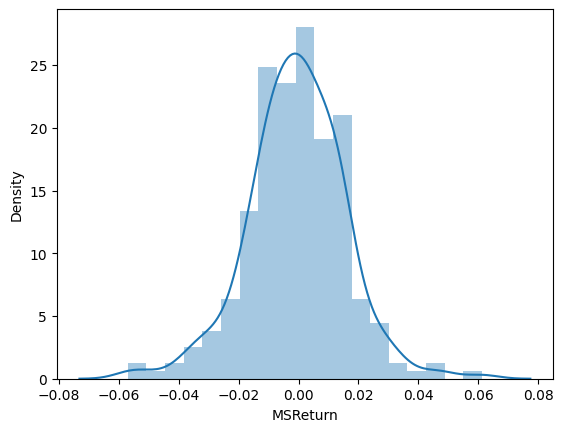

In [39]:
sns.distplot(returns[(returns.index.date >= dt.date(2015, 1, 1)) & (returns.index.date < dt.date(2016, 1, 1))]['MSReturn'])

**Crie um distplot usando seaborn dos retornos de 2008 para CitiGroup**

C:\Users\Diego\AppData\Local\Temp\ipykernel_5212\1265594766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns[(returns.index.date >= dt.date(2008, 1, 1)) & (returns.index.date < dt.date(2009, 1, 1))]['CReturn'])


<Axes: xlabel='CReturn', ylabel='Density'>

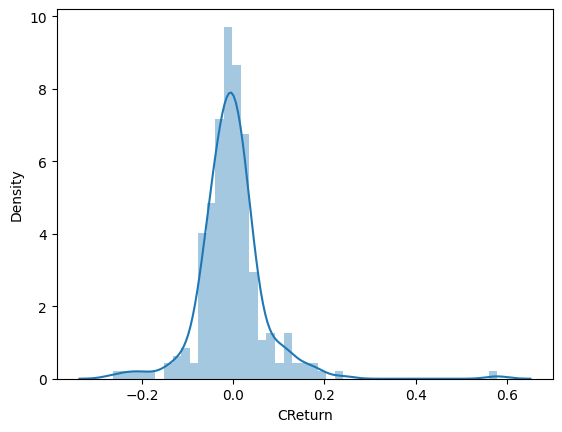

In [41]:
sns.distplot(returns[(returns.index.date >= dt.date(2008, 1, 1)) & (returns.index.date < dt.date(2009, 1, 1))]['CReturn'])

# Mais visualização

Muito desse projeto se concentrará em visualizações. Sinta-se livre para usar qualquer uma das suas bibliotecas de visualização preferidas para tentar recriar os plots descritos abaixo, seaborn, matplotlib, plotly e cufflinks, ou apenas pandas.

### Importações

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. (Sugestão: tente usar um loop for ou use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obter uma seção transversal dos dados .)**

In [43]:
bank_stocks

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   
...            ...    ...    ...    ...       ...    ...    ...    ...    ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415  52.48  52.97  52.45  52.71   
2015-12-28   17.22  17.23  16.98  17.13  41759993  52.57  52.57  51.96  52.38   
2015-12-29   17.25  17.35  17.16  17.28  45628449  52.76  53.22  52.74  52.98   
2015-12-30   17.20  17.24  17.04  17.05  35035518  52.84  52.94  52.25  52.30   
2015-12-31   17.01  17.07  16.83  16.83  47106760  52.07  52.39  51.75  51.75   

Bank Ticker            ...     MS                                      WFC  \
Stock Info     volume  ...   open     high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.4900  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.2800  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.5900  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.8500  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.2900  58.6244  59.19  4144500  63.35   
...               ...  ...    ...      ...      ...    ...      ...    ...   
2015-12-24    4671254  ...  32.57  32.7100  32.4400  32.48  2798163  54.97   
2015-12-28    8760444  ...  32.36  32.3600  31.9500  32.17  5420280  54.55   
2015-12-29   10153534  ...  32.44  32.7016  32.3250  32.55  6388244  55.11   
2015-12-30    8763137  ...  32.50  32.6450  32.2000  32.23  5057162  55.27   
2015-12-31   11274831  ...  31.91  32.3000  31.7700  31.81  8149307  54.51   

Bank Ticker                                    
Stock Info      high     low  close    volume  
2006-01-03   63.9500  62.390  63.80   5508200  
2006-01-04   63.6400  62.730  63.06   5435000  
2006-01-05   63.1100  62.620  62.99   5079000  
2006-01-06   63.5500  62.770  63.36   4201900  
2006-01-09   63.6500  63.110  63.35   2809800  
...              ...     ...    ...       ...  
2015-12-24   55.0900  54.710  54.82   4999417  
2015-12-28   54.7800  54.170  54.68   8288759  
2015-12-29   55.3500  54.990  55.29   7894876  
2015-12-30   55.3100  54.794  54.89   8016893  
2015-12-31   54.9499  54.220  54.36  10929420  

[2517 rows x 30 columns]

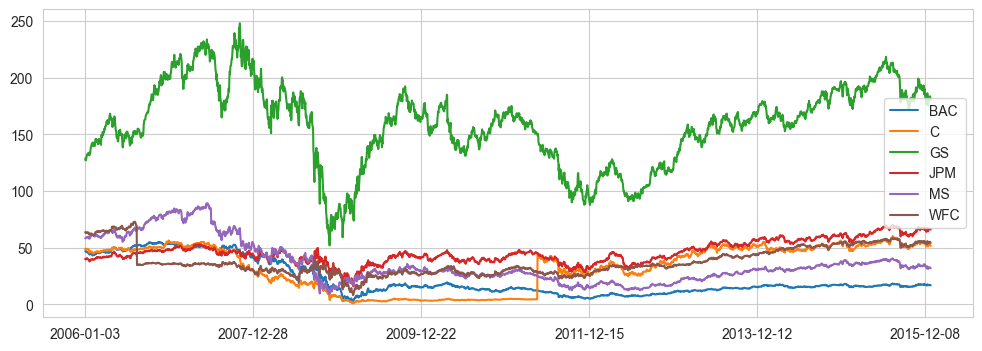

In [46]:
# gráfico de linha mostrando o preço  de fechamento para cada banco para todo o índice de tempo
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12, 4), label=tick)
plt.legend()

<Axes: >

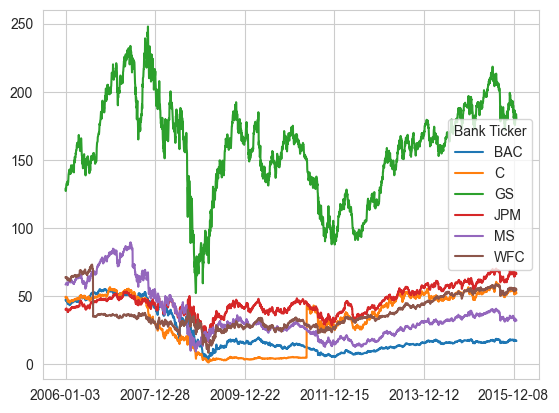

In [48]:
#%% 2º forma de plotar o gráfico de fechamentos
bank_stocks.xs(key='close', level='Stock Info', axis=1).plot()

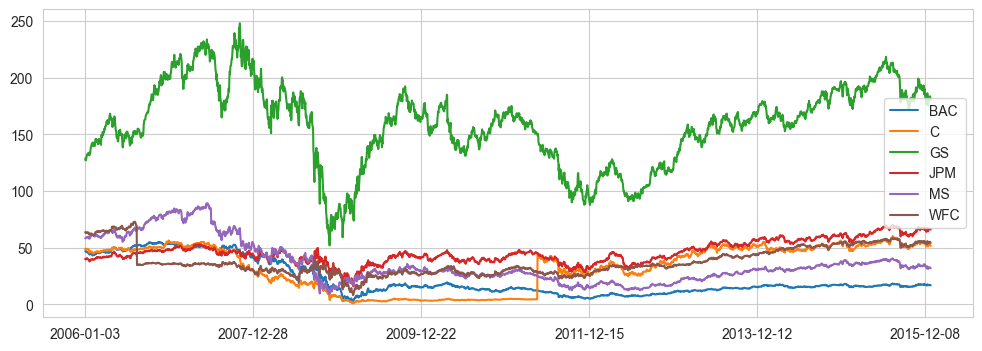

In [49]:
bank_stocks.xs(key='close', level='Stock Info', axis = 1).plot(figsize=(12, 4))
plt.legend()

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

**Trace a média de 30 dias para o preço próximo do Bank Of America para o ano de 2008**

Foi necessário criar uma funçao para converter o index str em objeto datatime visto que esse processo ja foi necessário antes, então essa função vai nos economizar tempo futuramente

In [53]:
def convert_to_datetime (df):
    # Verifica se o objeto é um DataFrame
    if not isinstance(df, pd.DataFrame):
        print('O objeto não é um DataFrame. Insira um DataFrame!')

# Convertendo para datetime
    df.index = pd.to_datetime(df.index, errors='coerce')  # 'coerce' trata valores inválidos

# Verificando se a conversão foi bem-sucedida
    if isinstance(df.index, pd.DatetimeIndex):
        print("\nA conversão para datetime foi bem-sucedida!")
    else:
        print("\nA conversão para datetime falhou.")

In [54]:
BAC = bank_data['BAC']

In [55]:
#%% conveter o index(que são str na forma: AAAA - MM - DD HH:MM:SS) em 'TimeStamp'
convert_to_datetime(BAC)


A conversão para datetime foi bem-sucedida!


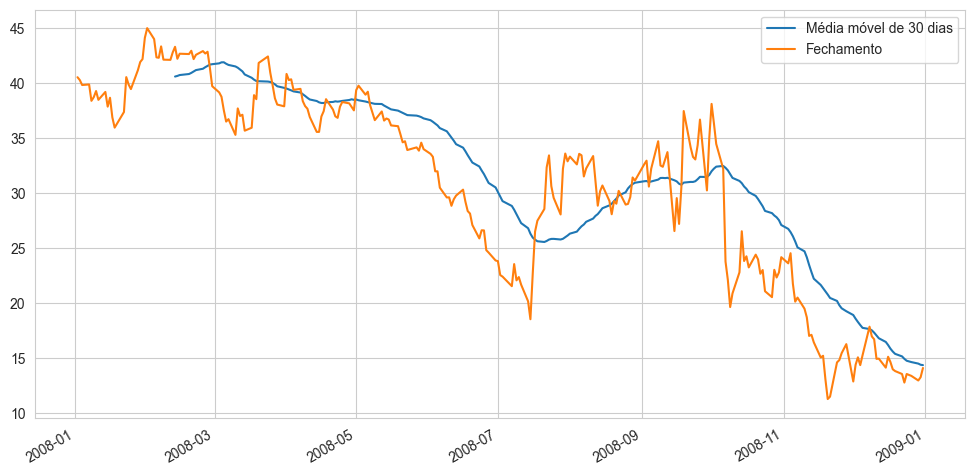

In [57]:
# filtrar os anos de 2008
plt.figure(figsize=(12, 6))
BAC2008 = BAC['close'][BAC.index.year == 2008]
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot(label='Média móvel de 30 dias')
BAC2008.plot(label='Fechamento')
plt.legend()

**Crie um mapa de calor da correlação entre os preços de fechamento das ações.**

In [58]:
corr_matrix = bank_stocks.xs(key='close',level='Stock Info', axis=1).corr()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

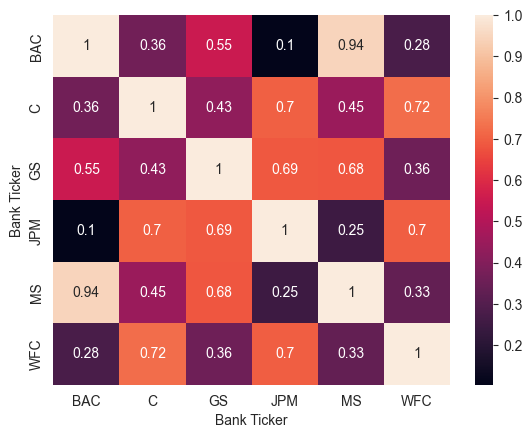

In [59]:
sns.heatmap(corr_matrix, annot=True)

**Opcional: use o clustermap do seaborn para agrupar as correlações:**

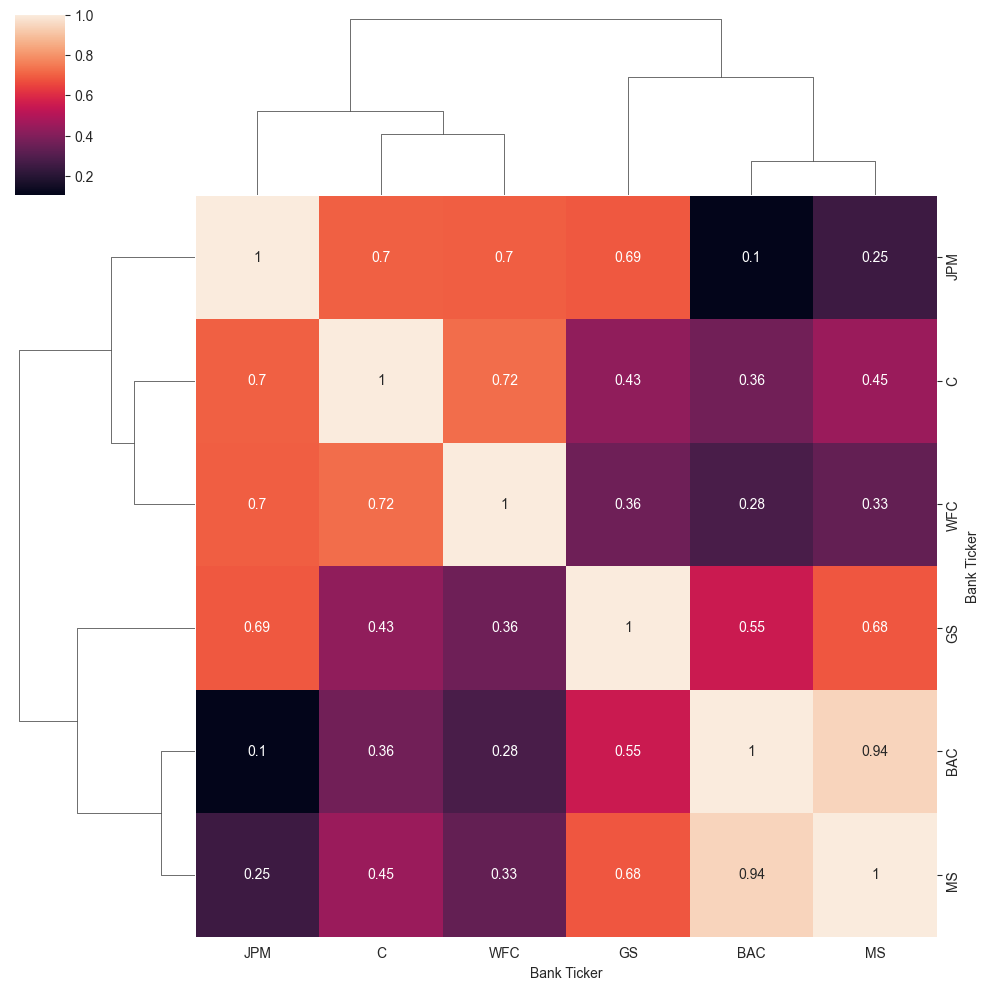

In [60]:
sns.clustermap(corr_matrix, annot=True)

Definitivamente, muitos tópicos de finanças específicos aqui, então não se preocupe se você não os entendeu todos! A única coisa que você deve se preocupar até o momento é a compreensão dos pandas básicos e operações de visualização.